# Basic Data Exploration for Tourist Crimes Bogotá (2019-2021):

Let's do an exploration data analysis for the high-impact crimes committed against tourists in  Bogotá:

1. Has the numbers of crimes increase from 2019 to 2021?
2. During which hours are crimes most likely to occur?
3. Are there more crimes on weekdays than weekends?
4. What are the top 5 neighborhood where the crimes occur?
5. For each neighborhood, during which hours are crimes most likely to occur?
6. What are the top 5 modalities used for crimes? 
7. What are the top 5 places where the crimes occur?
8. What types of weapons are most involved in crimes per town?

In [1]:
!pip install -r requirements.txt --user

In [1]:
import numpy                 as np
import pandas                as pd
import seaborn as sns
import matplotlib.pyplot as plt
import branca              
import geopandas
import folium # package for making maps, please make sure to use a version older than 1.0.0.

In [50]:
with open('data/6. Base de datos Delitos Bogota 2019_2021.csv') as f:
    df_crimes=pd.read_csv(f, delimiter='|', encoding="UTF-8")
df_crimes.shape

(179, 27)

In [8]:
df_crimes.head()

,JURISMETROPOLITANADEPTO,MUNICIPIO_HECHO,COMUNAS_ZONAS_DESCRIPCION,DESCRIPCION_CONDUCTA,BARRIOS_HECHO,FECHA_HECHO,MES_LARGO,DIA_SEMANA,INTERVALOS_HORA,HORA_HECHO,...,EDAD,AGRUPA_EDAD_PERSONA,GRADO_INSTRUCCION_PERSONA,JURISESTACIONAREA,JURISCAI,MES,ANIO,DIA,LATITUD_Y,LONGITUD_X
0,M. BOGOTÁ,BOGOTÁ D.C. (CT),UPZ No. 93 LAS NIEVES ENO REPORTADO3,ARTÍCULO 239. HURTO PERSONAS,VERACRUZ ENO REPORTADO3,9/8/2019,Agosto,Viernes,18:00 NO REPORTADO 23:59,9:30:00 p. m.,...,19,ADULTOS,SECUNDARIA,ESTACION ENO REPORTADO03 SANTA FE,CAI COLSEGUROS ENO REPORTADO3,8,2019,9,"4,601635086","-74,06970504"
1,M. BOGOTÁ,BOGOTÁ D.C. (CT),UPZ No. 94 LA CANDELARIA ENO REPORTADO17,ARTÍCULO 239. HURTO PERSONAS,LA CATEDRAL ENO REPORTADO17,1/4/2019,Abril,Lunes,18:00 NO REPORTADO 23:59,8:30:00 p. m.,...,20,ADULTOS,SUPERIOR,ESTACION ENO REPORTADO17 CANDELARIA,CAI ROSARIO ENO REPORTADO17,4,2019,1,NaN,NaN
2,M. BOGOTÁ,BOGOTÁ D.C. (CT),UPZ No. 94 LA CANDELARIA ENO REPORTADO17,ARTÍCULO 239. HURTO PERSONAS,CANDELARIA ENO REPORTADO17,9/8/2019,Agosto,Viernes,00:00 NO REPORTADO 05:59,5:00:00 a. m.,...,20,ADULTOS,SECUNDARIA,ESTACION ENO REPORTADO17 CANDELARIA,CAI ROSARIO ENO REPORTADO17,8,2019,9,"4,596988418","-74,06957093"
3,M. BOGOTÁ,BOGOTÁ D.C. (CT),UPZ No. 94 LA CANDELARIA ENO REPORTADO17,ARTÍCULO 239. HURTO PERSONAS,LA CONCORDIA ENO REPORTADO17,9/8/2019,Agosto,Viernes,18:00 NO REPORTADO 23:59,9:00:00 p. m.,...,20,ADULTOS,SUPERIOR,ESTACION ENO REPORTADO17 CANDELARIA,CAI ROSARIO ENO REPORTADO17,8,2019,9,"4,596988418","-74,06957093"
4,M. BOGOTÁ,BOGOTÁ D.C. (CT),UPZ No. 94 LA CANDELARIA ENO REPORTADO17,ARTÍCULO 239. HURTO PERSONAS,CANDELARIA ENO REPORTADO17,17/1/2019,Enero,Jueves,12:00 NO REPORTADO 17:59,4:30:00 p. m.,...,21,ADULTOS,SUPERIOR,ESTACION ENO REPORTADO17 CANDELARIA,CAI BOLIVIA ENO REPORTADO17,1,2019,17,"4,595336143","-74,07260719"


In [9]:
df_crimes.columns

Index(['JURISMETROPOLITANADEPTO', 'MUNICIPIO_HECHO',
       'COMUNAS_ZONAS_DESCRIPCION', 'DESCRIPCION_CONDUCTA', 'BARRIOS_HECHO',
       'FECHA_HECHO', 'MES_LARGO', 'DIA_SEMANA', 'INTERVALOS_HORA',
       'HORA_HECHO', 'GENERO', 'MODALIDAD', 'PAIS_PERSONA', 'CARGO_PERSONA',
       'CLASE_SITIO', 'ZONA', 'ARMAS_MEDIOS', 'EDAD', 'AGRUPA_EDAD_PERSONA',
       'GRADO_INSTRUCCION_PERSONA', 'JURISESTACIONAREA', 'JURISCAI', 'MES',
       'ANIO', 'DIA', 'LATITUD_Y', 'LONGITUD_X'],
      dtype='object')

The dataset has 27 columns and 179 rows, in which we have the following columns:

1. ```JURISMETROPOLITANADEPTO```: Jurisdiction / crime department
2. ```MUNICIPIO_HECHO```: Town/borough where the crime occurs
3. ```COMUNAS_ZONAS_DESCRIPCION```: Crime zone identification
4. ```DESCRIPCION_CONDUCTA```: Type of crime
5. ```BARRIOS_HECHO```: Neighborhood where the crime occurs
6. ```FECHA_HECHO```: Date when the crime occurs
7. ```MES_LARGO```: Month when the crime occurs
8. ```DIA_SEMANA```: Weekday of the crime
9. ```INTERVALOS_HORA```: Crime time slots (groups of 6 hours)
10. ```HORA_HECHO```: Time when the crime occurs
11. ```GENERO```: Complainant's gender
12. ```MODALIDAD```: Modality of crime
13. ```PAIS_PERSONA```: Country of residence of the person reporting the crime
14. ```CARGO_PERSONA```: Origin of the tourist
15. ```CLASE_SITIO```: Place where the crime occurred
16. ```ZONA```: Urban or rural area
17. ```ARMA_MEDIOS```: Weapon or means used to commit the crime
18. ```EDAD```: Complainant's age
19. ```AGRUPA_EDAD_PERSONA```: Complainant Age Categories
20. ```GRADO_INSTRUCCION_PERSONA```: Education level of the crime victim
21. ```JURISESTACIONAREA```: Jurisdiction station area
22. ```JURISCAI```: CAI’s name when the crime was reported
23. ```MES```: Month when crime occurs
24. ```ANIO```: Year when crime occurs
25. ```DIA```: Day when crime occurs
26. ```LATITUD_Y```: Latitude
27. ```LONGITUD_X```: Longitude

The following table shows some descriptive statistics variables that allows to make some conclusions:
1. 50% of the crimes have ocurred only in 2019
2. Between 2019 and 2021, have been reported 179 crimes against tourists in Bogotá
3. The crimes's accusers are between 19 and 70 years old

In [10]:
df_crimes.describe()

,EDAD,MES,ANIO,DIA
count,179.000000,179.000000,179.000000,179.000000
mean,34.519553,4.653631,2019.463687,16.229050
std,13.105167,2.646309,0.720931,8.772918
min,19.000000,1.000000,2019.000000,1.000000
25%,25.000000,2.000000,2019.000000,9.000000
50%,30.000000,5.000000,2019.000000,15.000000
75%,41.500000,7.000000,2020.000000,25.000000
max,70.000000,12.000000,2021.000000,31.000000


In [56]:
def crimesbymonth(df):

    df['FECHA_HECHO'] = pd.to_datetime(df['FECHA_HECHO'], format="%d/%m/%Y", errors='coerce')
    monthly_crimes = df.groupby(df.FECHA_HECHO.dt.to_period('M')).size()
    return monthly_crimes

a = crimesbymonth(df_crimes)

FECHA_HECHO
2019-01     5
2019-02     8
2019-03     7
2019-04    20
2019-05    24
2019-06    16
2019-07    29
2019-08     8
2019-11     3
2020-01    16
2020-02    15
2020-03     2
2020-11     1
2020-12     1
2021-01     3
2021-02     5
2021-03     5
2021-04     1
2021-06     1
2021-08     2
2021-09     4
2021-10     3
Freq: M, dtype: int64

For our next step, let's do a comparison of the crime frecuency between 2019 and 2022

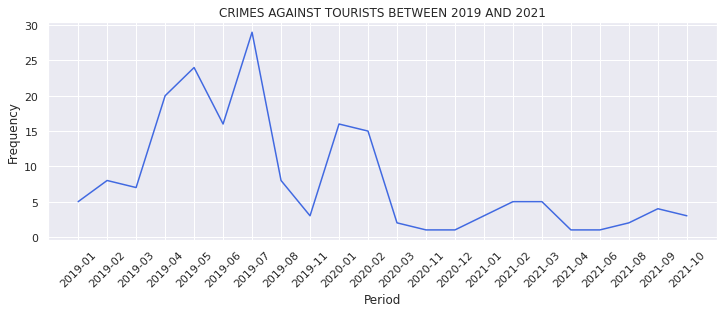

In [57]:
monthly_crimes_df = crimesbymonth(df_crimes).to_frame().reset_index()
monthly_crimes_df.columns.values[0] = "PERIOD"
monthly_crimes_df.columns.values[1] = "FREQUENCY"
monthly_crimes_df['PERIOD'] = monthly_crimes_df['PERIOD'].astype(str)
sns.set(rc = {'figure.figsize':(12,4)})
ax = sns.lineplot(data=monthly_crimes_df, x="PERIOD", y="FREQUENCY", color='royalblue')
ax.set(title='CRIMES AGAINST TOURISTS BETWEEN 2019 AND 2021', xlabel='Period', ylabel='Frequency')
ax.set_xticks(range(len(monthly_crimes_df)))
ax.set_xticklabels(monthly_crimes_df["PERIOD"],rotation=45);

The plot above shows that compared to 2019, there was a decrease in 2020 and 2021 related to crimes against tourists in Bogotá. We can see also a high peak between June 2019 and Septembre 2019.

In [10]:
def crimesbyhour(df):

    df['HOUR'] = pd.to_datetime(df['HORA_HECHO'], errors='coerce').dt.hour
    hourly_crimes = df.groupby('HOUR').size()
    
    return hourly_crimes

From the below plot, we can analyze what are the crimes frequency per hour of the day

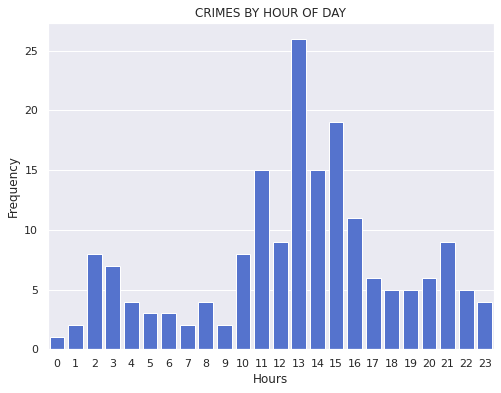

In [11]:
hourly_crimes_df = crimesbyhour(df_crimes).to_frame().reset_index()
hourly_crimes_df.columns.values[1] = "FREQUENCY"
sns.set(rc = {'figure.figsize':(8,6)})
ax = sns.barplot(data=hourly_crimes_df, x="HOUR", y="FREQUENCY", color='royalblue')
ax.set(title='CRIMES BY HOUR OF DAY', xlabel='Hours', ylabel='Frequency');

The plot shows that the most crimes ocurr between 11:00 and 15:00 hours, and during de morning ocurr the least numbers of crimes.

In [36]:
def crimesbyweekdays(df):

    weekday_crimes = df.groupby(df['DIA_SEMANA']).size()
    return weekday_crimes

a = crimesbyweekdays(df_crimes)
a.head()

DIA_SEMANA
Domingo      23
Jueves       26
Lunes        31
Martes       28
Miércoles    28
dtype: int64

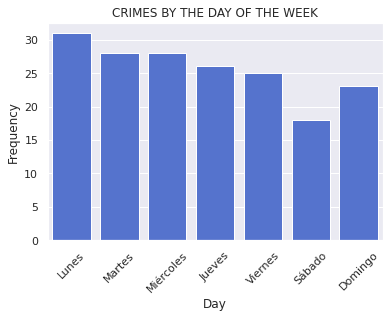

In [40]:
weekday_crimes_df = crimesbyweekdays(df_crimes).to_frame().reset_index()
weekday_crimes_df.columns.values[0] = "DAY"
weekday_crimes_df.columns.values[1] = "AMOUNT"
weekDayOrder = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
sns.set(rc = {'figure.figsize':(6,4)})
ax = sns.barplot(data=weekday_crimes_df, x="DAY", y="AMOUNT", color="royalblue", order = weekDayOrder)
ax.set(title='CRIMES BY THE DAY OF THE WEEK', xlabel='Day', ylabel='Frequency')
ax.set_xticklabels(weekDayOrder,rotation=45);

The previos plot shows a decreasing in the number of crimes, from Monday to Sunday, being Saturday the day with the least number of crimes. And the other hand, the most crimes happen mainly at weekdays from Monday to Friday. 

In [44]:
def crimesbyneighborhood(df):
    
    zone_df = df.groupby(df['COMUNAS_ZONAS_DESCRIPCION']).size().to_frame().reset_index()
    zone_df.columns.values[1] = "FREQUENCY"
    
    return zone_df

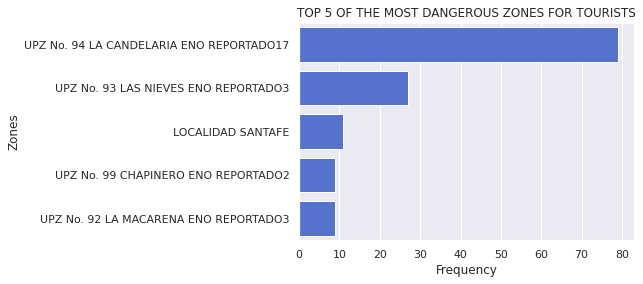

In [45]:
top5_zone_crimes_df = crimesbyneighborhood(df_crimes).sort_values(by='FREQUENCY', ascending=False).head(5)
sns.set(rc = {'figure.figsize':(6,4)})
ax = sns.barplot(data=top5_zone_crimes_df, x='FREQUENCY', y="COMUNAS_ZONAS_DESCRIPCION", color="royalblue")
ax.set(title='TOP 5 OF THE MOST DANGEROUS ZONES FOR TOURISTS', xlabel='Frequency', ylabel='Zones');

The plot shows that the zone with most crimes is La Candelaria, which has almost 3 times the crimes of the second area with the most crimes (Las Nieves), and it seems to have more than the 50% of the total crimes committed inside the top 5 areas.

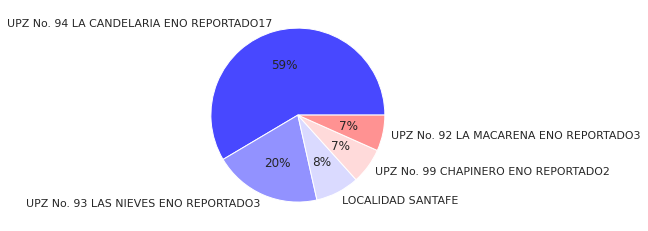

In [66]:
top5_zone_crimes_df = crimesbyneighborhood(df_crimes).sort_values(by='FREQUENCY', ascending=False).head(5)
colors = sns.color_palette('bwr')[0:5]
plt.pie(data=top5_zone_crimes_df, x='FREQUENCY' , labels = "COMUNAS_ZONAS_DESCRIPCION", colors = colors, autopct='%.0f%%')
plt.title()
plt.show()

In [59]:
def crimesbytypeoftourist(df):

    nat_tourist_df = df.groupby(df['CARGO_PERSONA']).size().to_frame().reset_index()
    nat_tourist_df.columns.values[1] = "FREQUENCY"
    
    return nat_tourist_df

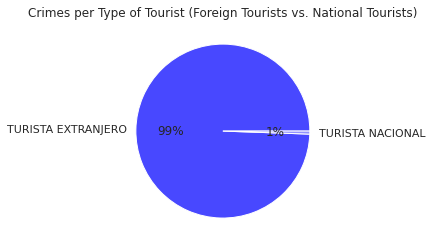

In [63]:
typeoftourist_crimes_df = crimesbytypeoftourist(df_crimes).sort_values(by='FREQUENCY', ascending=False)
colors = sns.color_palette('bwr')[0:5]
plt.pie(data=typeoftourist_crimes_df, x='FREQUENCY' , labels = "CARGO_PERSONA", colors = colors, autopct='%.0f%%')
plt.title('Crimes per Type of Tourist (Foreign Tourists vs. National Tourists)')
plt.show()

The piechart shows that the most crimes are commited againts foreign tourist (99%), and only the 1% are committed against national tourist. This may be due to the fact that the national tourist is better acquainted with the Colombian culture, and is also aware of the measures that must be taken, in order to avoid this type of situation.